<a href="https://colab.research.google.com/github/Ivonne9140/ML_Ivonne/blob/main/NonLinearModelsStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sept06 Class

Reference: https://daddyawesome.github.io/data_science/non%20linear%20regression%20analysis/python/machine%20learning/2020/04/27/MachineLearningRegNonLinearRegression.html


In [131]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
x= np.arange(-5.0, 5.0, 0.1)
m=2
b=3
y=m*(x)+b
y_noise = m*np.random.normal(size=x.size)
ydata = y+y_noise


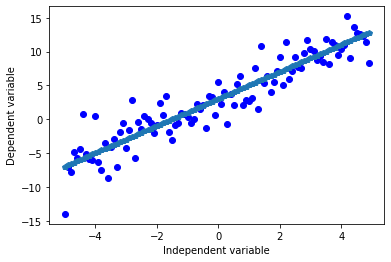

In [133]:
plt.plot(x,ydata, 'bo')
plt.plot(x,y,'p')
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.show()

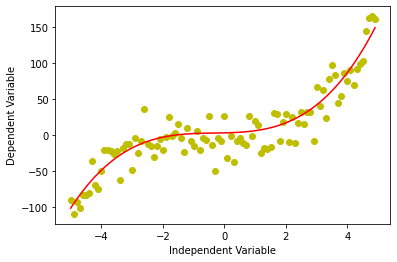

In [134]:
x=np.arange(-5.0, 5.0,0.1)
y=1*(x**3)+1*(x**2)+1*x+3
y_noise = 20*np.random.normal(size=x.size)
ydata=y+y_noise
plt.plot(x,ydata,'yo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

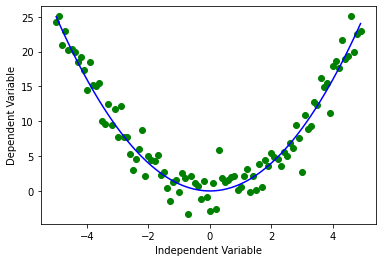

In [135]:
x = np.arange(-5.0, 5.0, 0.1)
y=np.power(x,2)
y_noise = 2*np.random.normal(size=x.size)
ydata = y+y_noise
plt.plot(x,ydata,'go')
plt.plot(x,y,'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

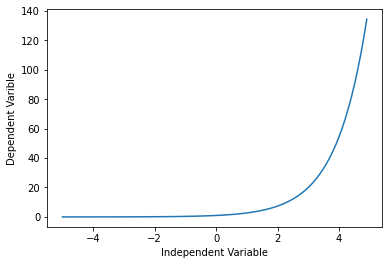

In [136]:
x=np.arange(-5.0, 5.0, 0.1)
y=np.exp(x)
plt.plot(x,y)
plt.ylabel('Dependent Varible')
plt.xlabel('Independent Variable')
plt. show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


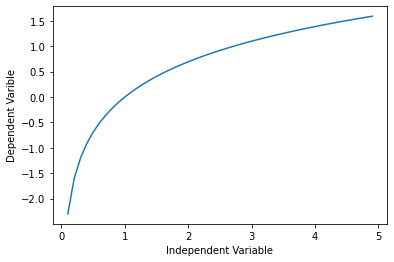

In [137]:
x=np.arange(-5.0, 5.0, 0.1)
y=np.log(x)
plt.plot(x,y)
plt.ylabel('Dependent Varible')
plt.xlabel('Independent Variable')
plt.show()

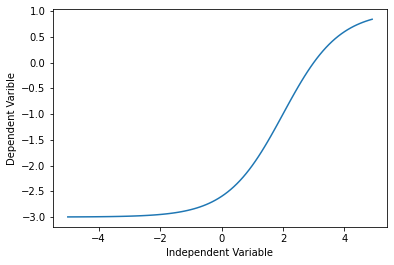

In [138]:
x=np.arange(-5.0, 5.0, 0.1)
y=1-4/(1+np.power(3,x-2))
plt.plot(x,y)
plt.ylabel('Dependent Varible')
plt.xlabel('Independent Variable')
plt. show()

In [139]:
import numpy as np
import pandas as pd
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
#df = pd.read_csv("china_gdp.csv")
url='https://raw.githubusercontent.com/Ivonne9140/ML_Ivonne/main/china_gdp.csv'
#url='https://raw.githubusercontent.com/Ivonne9140/ML_Ivonne/main/ReporteVentas.csv'
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


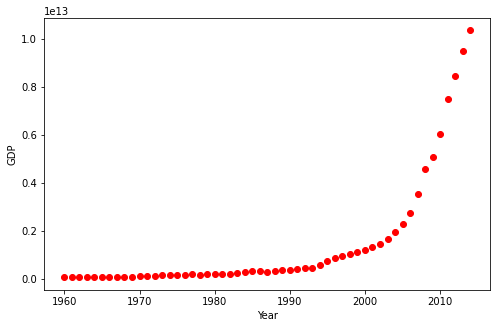

In [140]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
#x_data, y_data = (df["Trimestre"].values, df["Ventas"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

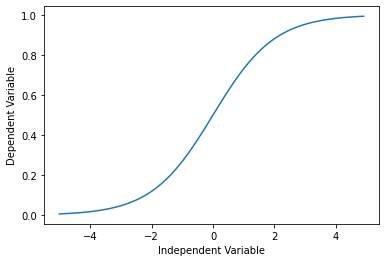

In [141]:
x=np.arange(-5.0,5.0,0.1)
y=1.0/(1.0+np.exp(-x))
plt.plot(x, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [142]:
def sigmoid(x,beta1,beta2):
  y=1/(1+np.exp(-beta1*(x-beta2)))
  return y

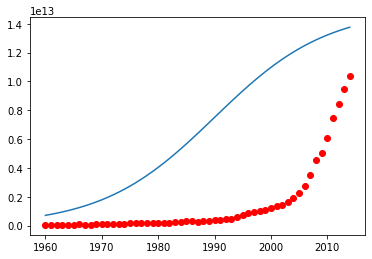

In [143]:
beta1 = 0.10
beta2 = 1990.0
y_pred = sigmoid(x_data,beta1, beta2 )
plt.plot(x_data,y_pred*15000000000000.)
plt.plot(x_data,y_data,'ro')

In [144]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [145]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print ("beta1 = %f, beta2 = %f" %(popt[0], popt[1]))

beta1 = 690.453019, beta2 = 0.997207


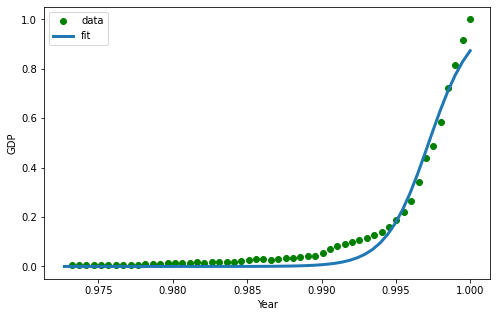

In [146]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize = (8,5))
y=sigmoid(x,*popt)
plt.plot(xdata,ydata, 'go', label ='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [147]:
msk=np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]
popt,pcov = curve_fit(sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat-test_y)**2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat, test_y))

Mean absolute error: 0.20
Residual sum of squares (MSE): 0.13
R2-score: -274962910372307121426474192601088.00


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
